In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [7]:
airPlane=np.load("../data_npy/airplane.npy",encoding='latin1',allow_pickle=True)

In [8]:
img=airPlane[0]

In [9]:
# img=img.reshape(28,28)

In [7]:
# img=img/255

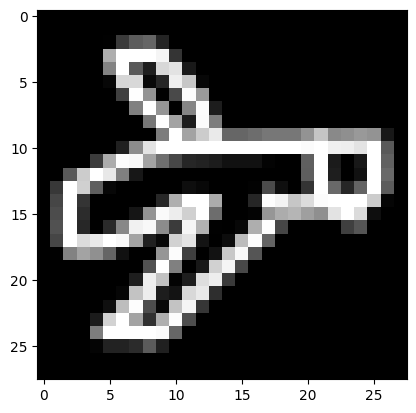

In [8]:
plt.imshow(img,cmap='gray')

In [54]:
def strokeToImage(strokes):

    
    x, y = strokes[0][0], strokes[0][1]

    print("x0 ",x," y0 ",y)

    # Create a figure and canvas to render the plot
    fig, ax = plt.subplots()
    canvas = FigureCanvas(fig)
    
    for stroke in strokes:
        dx, dy, pen_up = stroke
        
        print("dx ",dx," dy ",dy," pen up ",pen_up)

        new_x, new_y = x+dx, y+dy  

        print("")

        if pen_up == 0:
            ax.plot([x,new_x], [y,new_y], color='black')

        x, y = new_x, new_y

    # Set limits for the plot
    # ax.set_xlim(-500, 500)
    # ax.set_ylim(-500, 500)
    
    # Remove axis ticks and labels for a clean image
    ax.axis('off')

    # Render the plot to the canvas
    canvas.draw()

    # print("canvas.shape canva",canvas.shape)
    # Convert the canvas to a NumPy array
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    print("img.shape canva",image.shape, len(image))
    
    # Get the width and height from the figure
    width, height = fig.get_size_inches() * fig.get_dpi()
    print("img.shape canva",image.shape)


    # Reshape the buffer to the correct dimensions (height, width, 3) for an RGB image
    image = image.reshape(int(height), int(width), 3)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # bw_img will be of shape (32, 32)

    
    plt.close(fig)
    
    return img

In [101]:
airPlane_npz=np.load("../new_data/airplane.npz",encoding='latin1',allow_pickle=True)['train']
img_npz=airPlane_npz[66]
image=strokeToImage(img_npz)

x0  -30  y0  -2
dx  -30  dy  -2  pen up  0

dx  -52  dy  5  pen up  0

dx  -230  dy  1  pen up  0

dx  -28  dy  4  pen up  0

dx  -105  dy  30  pen up  0

dx  -48  dy  22  pen up  0

dx  -26  dy  19  pen up  0

dx  -6  dy  7  pen up  0

dx  -3  dy  10  pen up  0

dx  1  dy  33  pen up  0

dx  10  dy  23  pen up  0

dx  15  dy  13  pen up  0

dx  39  dy  13  pen up  0

dx  52  dy  2  pen up  0

dx  79  dy  -11  pen up  0

dx  103  dy  -28  pen up  0

dx  50  dy  -10  pen up  0

dx  279  dy  -19  pen up  0

dx  71  dy  -16  pen up  0

dx  29  dy  -11  pen up  0

dx  12  dy  -8  pen up  0

dx  5  dy  -16  pen up  0

dx  -1  dy  -14  pen up  0

dx  -22  dy  -19  pen up  0

dx  -31  dy  -14  pen up  0

dx  -65  dy  -10  pen up  0

dx  -178  dy  1  pen up  1

dx  -225  dy  3  pen up  0

dx  4  dy  -17  pen up  0

dx  31  dy  -32  pen up  0

dx  55  dy  -37  pen up  0

dx  52  dy  -29  pen up  0

dx  118  dy  -51  pen up  0

dx  66  dy  -21  pen up  0

dx  71  dy  -15  pen up  0

dx  52  dy  

/tmp/ipykernel_17640/3445312730.py:38: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed in 3.10. Use buffer_rgba instead.
  image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')


In [125]:
import pandas as pd
df=pd.DataFrame(img_npz)
# df.head()
df

,0,1,2
0,-30,-2,0
1,-52,5,0
2,-230,1,0
3,-28,4,0
4,-105,30,0
5,-48,22,0
6,-26,19,0
7,-6,7,0
8,-3,10,0
9,1,33,0


In [126]:
# dd=df.to_numpy()
# dd

In [122]:
df_new=pd.DataFrame()
df_np=df.to_numpy()
for row in df_np:
    print(row)
    break

# df['Address'] = address

[-30  -2   0]
[-52   5   0]
[-230    1    0]
[-28   4   0]
[-105   30    0]
[-48  22   0]
[-26  19   0]
[-6  7  0]
[-3 10  0]
[ 1 33  0]
[10 23  0]
[15 13  0]
[39 13  0]
[52  2  0]
[ 79 -11   0]
[103 -28   0]
[ 50 -10   0]
[279 -19   0]
[ 71 -16   0]
[ 29 -11   0]
[12 -8  0]
[  5 -16   0]
[ -1 -14   0]
[-22 -19   0]
[-31 -14   0]
[-65 -10   0]
[-178    1    1]
[-225    3    0]
[  4 -17   0]
[ 31 -32   0]
[ 55 -37   0]
[ 52 -29   0]
[118 -51   0]
[ 66 -21   0]
[ 71 -15   0]
[52 -4  0]
[71  0  0]
[-1  5  0]
[-70  72   0]
[-69  54   0]
[-21  31   0]
[-7 15  0]
[-3 16  1]
[-279  155    0]
[71 49  0]
[25 14  0]
[56 24  0]
[59 19  0]
[82 18  0]
[51  7  0]
[117   4   0]
[ -1 -17   0]
[ -6 -20   0]
[-14 -31   0]
[-35 -44   0]
[-45 -47   0]
[-22 -29   1]


In [127]:
new_data = []

# Start with the first row
current_row = df.iloc[0].copy()
new_data.append(current_row)


for i in range(1, len(df)):
    next_row = current_row.copy()
    next_row[0] += df.iloc[i][0]
    next_row[1] += df.iloc[i][1]
   
    next_row[2] = df.iloc[i][2]
    new_data.append(next_row)
    current_row = next_row


new_df = pd.DataFrame(new_data)

# print(new_data)
print(new_df)

     0    1  2
0  -30   -2  0
0  -82    3  0
0 -312    4  0
0 -340    8  0
0 -445   38  0
0 -493   60  0
0 -519   79  0
0 -525   86  0
0 -528   96  0
0 -527  129  0
0 -517  152  0
0 -502  165  0
0 -463  178  0
0 -411  180  0
0 -332  169  0
0 -229  141  0
0 -179  131  0
0  100  112  0
0  171   96  0
0  200   85  0
0  212   77  0
0  217   61  0
0  216   47  0
0  194   28  0
0  163   14  0
0   98    4  0
0  -80    5  1
0 -305    8  0
0 -301   -9  0
0 -270  -41  0
0 -215  -78  0
0 -163 -107  0
0  -45 -158  0
0   21 -179  0
0   92 -194  0
0  144 -198  0
0  215 -198  0
0  214 -193  0
0  144 -121  0
0   75  -67  0
0   54  -36  0
0   47  -21  0
0   44   -5  1
0 -235  150  0
0 -164  199  0
0 -139  213  0
0  -83  237  0
0  -24  256  0
0   58  274  0
0  109  281  0
0  226  285  0
0  225  268  0
0  219  248  0
0  205  217  0
0  170  173  0
0  125  126  0
0  103   97  1


In [129]:
new_df.head()

,0,1,2
0,-30,-2,0
0,-82,3,0
0,-312,4,0
0,-340,8,0
0,-445,38,0


In [130]:
# df1=df.iloc[]
df1=df[[0,1]]
df1.head()

,0,1
0,-30,-2
1,-52,5
2,-230,1
3,-28,4
4,-105,30


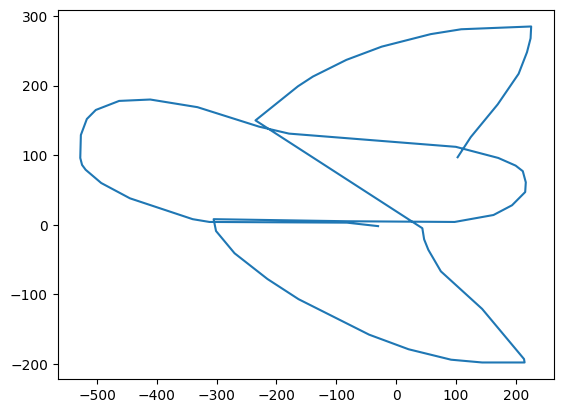

In [131]:
plt.plot(new_df[0], new_df[1])

In [132]:
# plt.plot(df1[0], df)

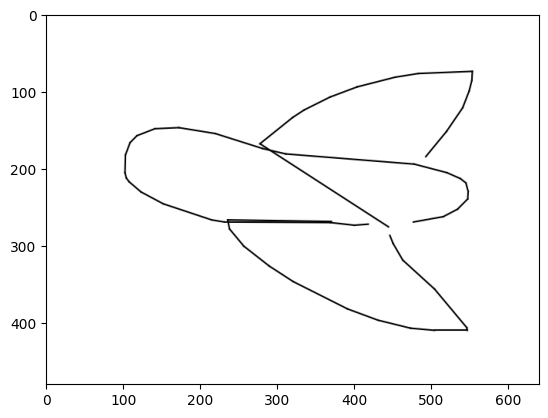

In [105]:
plt.imshow(image,cmap='gray')

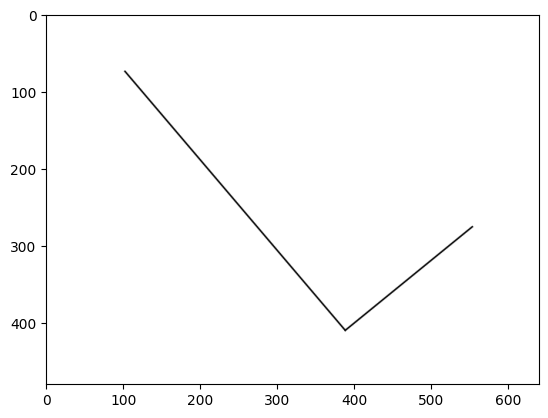

In [39]:
plt.imshow(image,cmap='gray')

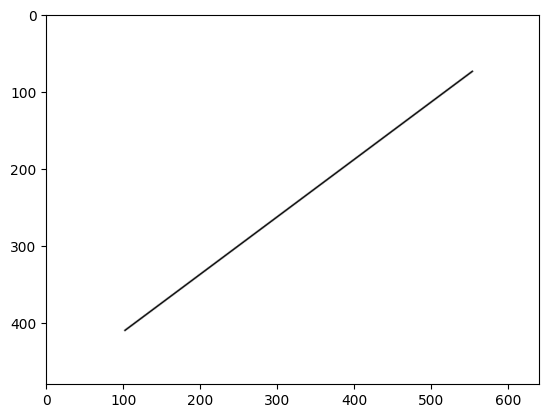

In [37]:
plt.imshow(image,cmap='gray')